<a href="https://colab.research.google.com/github/An0816/PyTorchZeroToAll/blob/main/lec4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Back Propagation

**Chain Rule**
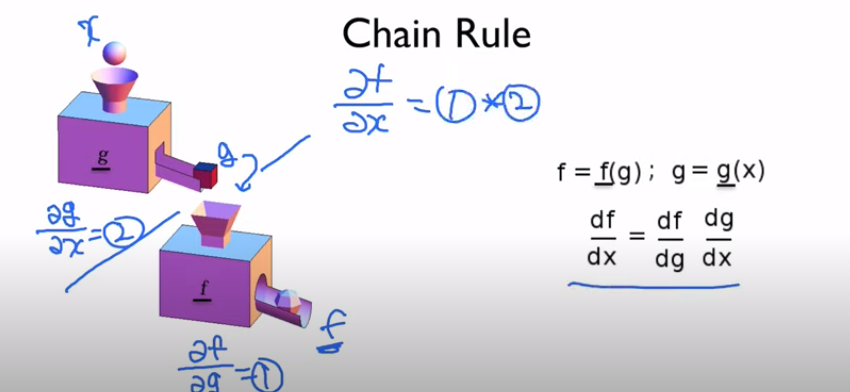

-> 결국 목표는 compute gradient loss with respect to x  
(compute each gradient and combine them)  
: **Chain Rule(Back Propagation)**

1. Forward Pass
2. Backward propagation : compute local gradient for each gate



0. torch
: main namespace  
: 다양한 수학 함수가 포함  
: Numpy와 같은 구조  
: pytorch의 가장 기본이 되는 데이터 구조와 기능을 제공하는 다차원 배열을 처리하기 위한 데이터 구조  


1. Autograd 패키지
: Tensor의 모든 연산에 대해 자동 미분을 위한 함수 포함


2. autograd.Variable 클래스
3. Tensor : 

# Implementation

In [ ]:
import torch
from torch.autograd import Variable 

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([1.0]), requires_grad = True)
# `requires_grad = False(Default)` : back propagation 중에 tensor들에 대한 변화도를 계산할 필요가 없음
# `requires_grad = True` : Tensor의 모든 연산에 대해 추적을 시작 -> 계산 작업이 모두 수행되면 `.backward()`를 통해 모든 gradient를 자동으로 계산하고 있음

def y_hat(x):
    return x * w

def loss(x, y):
    y_pred = y_hat(x)
    return (y_pred - y)**2

# training
for epoch in range(10):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val) # forward pass
        l.backward() # back propagation(compute gradient for every variable) 
        print("\tgrad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad.data 
        # w.grad.data에 최종적으로 구하고자 했던 loss/w 가 저장

        w.grad.data.zero_() # initialize our gradients
    print("progres: ", epoch, l.data[0])

print("predict after training ", 4, y_hat(4).data[0])

	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progres:  0 tensor(7.3159)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progres:  1 tensor(3.9988)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progres:  2 tensor(2.1857)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progres:  3 tensor(1.1946)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progres:  4 tensor(0.6530)
	grad:  1.0 2.0 tensor(-0.4417)
	grad:  2.0 4.0 tensor(-1.7316)
	grad:  3.0 6.0 tensor(-3.5845)
progres:  5 tensor(0.3569)
	grad:  1.0 2.0 tensor(-0.3266)
	grad:  2.0 4.0 tensor(-1.2802)
	grad:  3.0 6.0 tensor(-2.6500)
progres:  6 tensor(0.1951)
	grad:  1.0 2.0 tensor(-0.2414)
	grad:  2.0 4.0 tensor(-0.9465)
	grad:  3.0 6.0 tensor(-1.9592)
progres:  7 tensor(0.1066)
	grad:  1.0 2.0 te

### Torch 가지고 놀기
[Pytorch basic](https://gaussian37.github.io/dl-pytorch-basic/)

In [ ]:
import torch

In [ ]:
nums = torch.arange(9)
print(nums)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


In [ ]:
nums.shape

torch.Size([9])

In [ ]:
type(nums)

torch.Tensor

In [ ]:
nums.numpy() # numpy 타입으로 변환

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
nums.reshape(3, 3) # matrix 형태로 바꿔줌

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
nums = torch.arange(9).reshape(3, 3)
print(nums)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
nums + nums # matrix의 덧셈 연산도 지원

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

In [ ]:
import numpy as np

In [ ]:
torch.tensor([[1, 2], [3,4]]) # 2차원 리스트를 통해서 Tensor 생성

tensor([[1, 2],
        [3, 4]])

In [ ]:
torch.arange(0, 10) # 1차원 tensor로 변경

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
t = torch.tensor([[1,2,3], [4,5,6]])

In [ ]:
t[0, 2] # index 접근

tensor(3)

In [ ]:
t[:, :2] # slicing도 가능

tensor([[1, 2],
        [4, 5]])